# TRABAJO FINAL - DATA MINING & DATA ANALYSIS


## Integrantes:

- Fernando Daniel Quispe Condori -  u20221c628
- Elmer Augusto Riva Rodriguez - u202220829

## 1. Descripción del caso de uso


En el contexto actual de alta competitividad en el sector de distribución mayorista, entender el comportamiento de los clientes es vital para optimizar la cadena de suministro y las estrategias de marketing. Nuestro caso de uso se centra en un distribuidor mayorista que atiende a diversos canales (como hoteles, restaurantes, cafeterías y minoristas).

El problema que abordamos es la falta de segmentación clara basada en el comportamiento de compra real. Actualmente, los clientes pueden estar siendo tratados de manera genérica. Nuestra propuesta es utilizar técnicas de minería de datos no supervisada para descubrir patrones de consumo ocultos en las distintas categorías de productos. Al agrupar a los clientes en clústeres homogéneos, buscamos generar conocimiento que permita personalizar las políticas de precios, optimizar el inventario y diseñar campañas de cross-selling más efectivas, impactando positivamente en la rentabilidad del negocio.

## 2. Descripción del conjunto de datos


Utilizamos el conjunto de datos "Wholesale customers Data Set" proveniente del repositorio UCI Machine Learning. Este dataset consta de 440 instancias y 8 atributos. Los datos son multivariados y de tipo entero

Las variables se dividen en dos grupos:

1. Metadatos del cliente: Channel (Canal de venta: Horeca o Retail) y Region (Lisboa, Oporto u Otros).

2. Variables de comportamiento (Gasto anual en u.m.): Fresh (Productos frescos), Milk (Lácteos), Grocery (Comestibles), Frozen (Congelados), Detergents_Paper (Detergentes y papel) y Delicassen (Fiambrería).

Nuestro análisis se centrará principalmente en las variables continuas de gasto para realizar la segmentación, dejando los metadatos para la caracterización posterior de los clústeres.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import hdbscan



df = pd.read_csv('dataset.csv')
df.shape

(440, 8)

## 3. Análisis exploratorio de los datos (EDA)

Mostraremos primeras filas, estructura, estadísticas, nulos/duplicados, histogramas y matriz de correlación.

In [3]:
# Primeras filas y estructura
display(df.head())
print('Info:')
display(df.info())
print('Describe:')
display(df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

Describe:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Comprobar valores nulos y duplicados
print('Nulos por columna:\n', df.isnull().sum())
print('Duplicados totales:', df.duplicated().sum())

Nulos por columna:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Duplicados totales: 0


In [4]:
# Estadísticos descriptivos de las variables de gasto
spend_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
display(df[spend_cols].describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Al inspeccionar la estructura inicial del conjunto de datos, confirmamos que no existen valores nulos ni duplicados, lo cual garantiza la integridad técnica de la información. Sin embargo, al analizar los estadísticos descriptivos (describe), observamos una gran dispersión en los datos.

Notamos que la desviación estándar en la mayoría de las categorías de gasto es comparable o incluso superior a la media. Además, los valores máximos están extremadamente alejados del percentil 75% (por ejemplo, en Fresh o Grocery). Esto nos sugiere desde el inicio que estamos ante una distribución con una fuerte presencia de valores extremos o clientes con volúmenes de compra muy superiores al promedio.

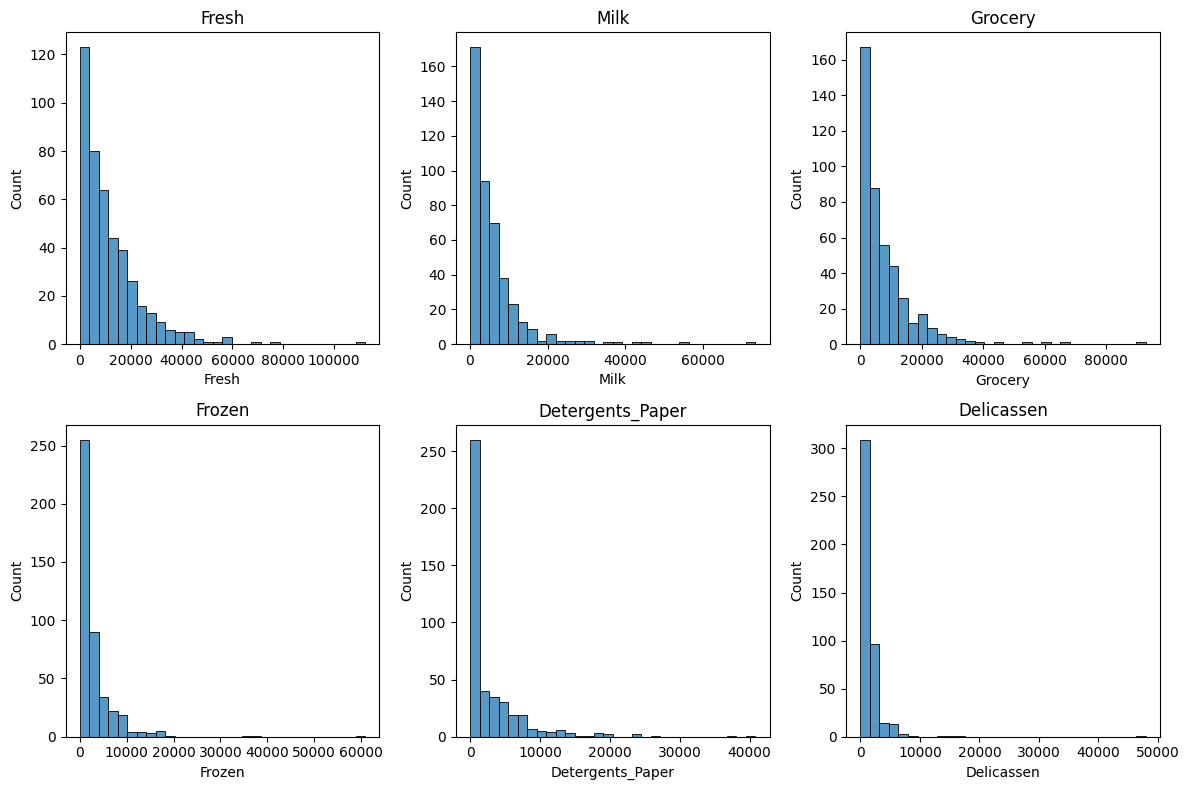

In [5]:
# Histogramas de las variables principales (gastos)
plt.figure(figsize=(12,8))
for i, col in enumerate(spend_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

Como se evidencia en los histogramas, todas las variables de gasto presentan una distribución fuertemente sesgada hacia la derecha (tipo exponencial). La gran mayoría de los clientes se concentra en rangos de gasto bajos o moderados (la "cabeza" de la distribución), mientras que una cola larga se extiende hacia la derecha representando a los clientes de mayor volumen. Esto nos indica que no podemos asumir una distribución normal (campana de Gauss) para estos datos sin una transformación previa o el uso de algoritmos robustos.

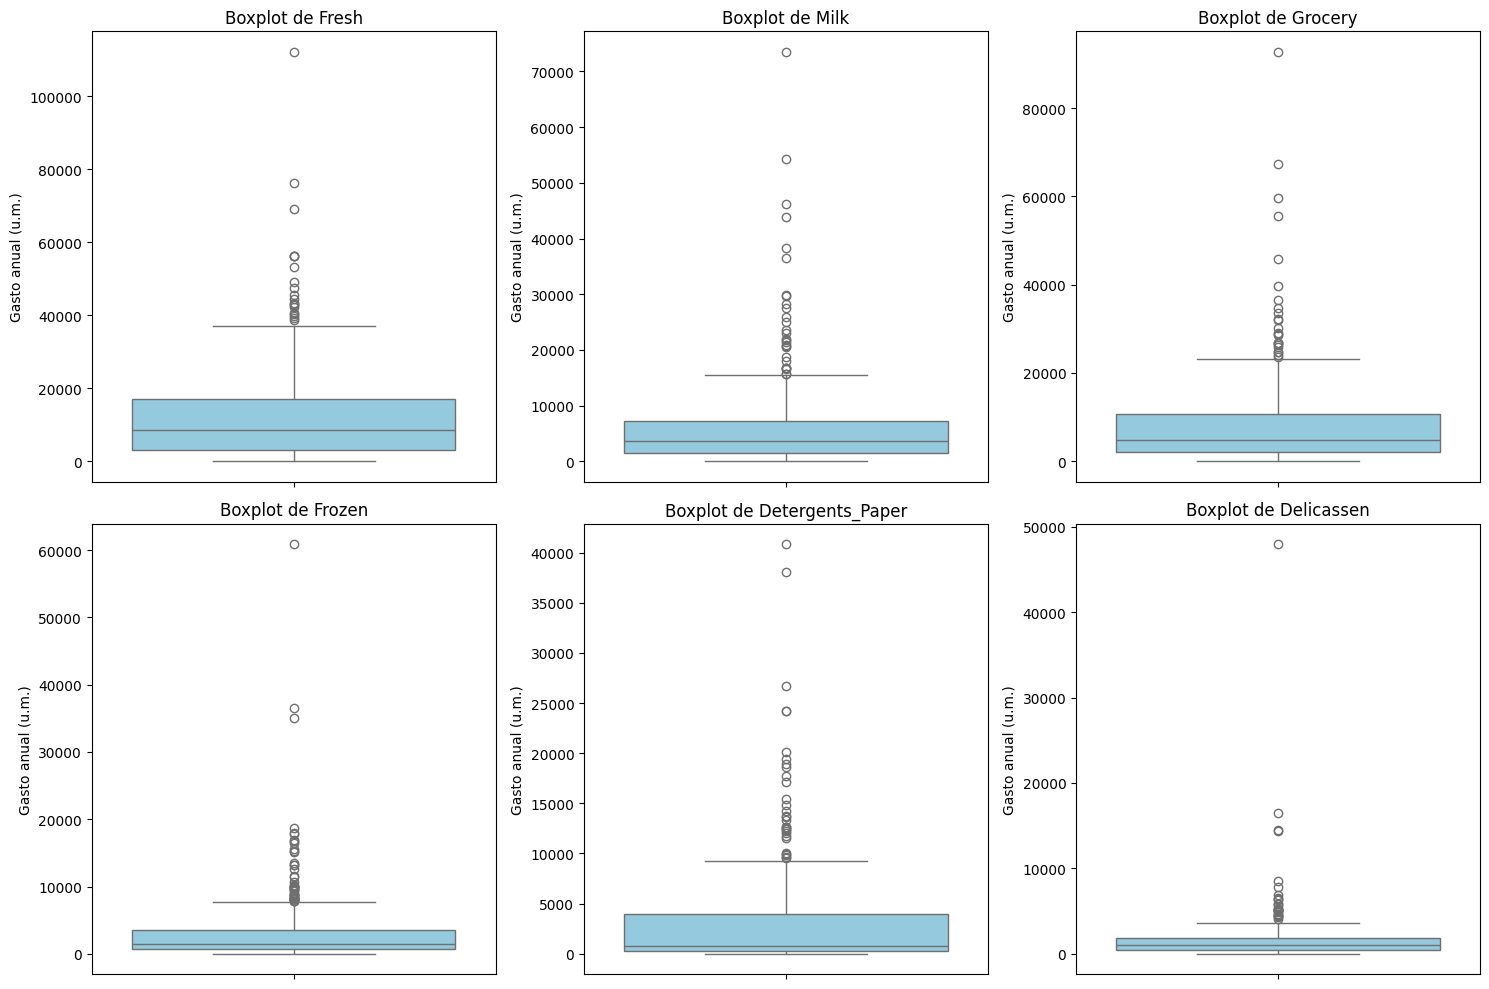

Conteo de valores atípicos (Outliers) por variable según método IQR:
------------------------------------------------------------
Fresh                | Cantidad: 20    | Porcentaje: 4.55%
Milk                 | Cantidad: 28    | Porcentaje: 6.36%
Grocery              | Cantidad: 24    | Porcentaje: 5.45%
Frozen               | Cantidad: 43    | Porcentaje: 9.77%
Detergents_Paper     | Cantidad: 30    | Porcentaje: 6.82%
Delicassen           | Cantidad: 27    | Porcentaje: 6.14%
------------------------------------------------------------


In [6]:
# --- CÓDIGO PARA DETECCIÓN DE OUTLIERS ---

# 1. Visualización: Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(spend_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Gasto anual (u.m.)')

plt.tight_layout()
plt.show()

# 2. Confirmación Numérica: Método del Rango Intercuartílico (IQR)
# Se considera outlier a todo valor que esté por encima de Q3 + 1.5*IQR
print("Conteo de valores atípicos (Outliers) por variable según método IQR:")
print("-" * 60)

outlier_report = {}

for col in spend_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos los outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    count = len(outliers)
    percentage = (count / len(df)) * 100

    outlier_report[col] = {'Cantidad': count, '% del Total': round(percentage, 2)}

    print(f"{col:<20} | Cantidad: {count:<5} | Porcentaje: {round(percentage, 2)}%")

print("-" * 60)

Mediante la inspección visual de los diagramas de caja y el cálculo del Rango Intercuartílico (IQR), hemos detectado una presencia significativa de valores atípicos en todas las categorías, oscilando entre el 4.5% y el 9.8% de las observaciones. La variable Frozen presenta la mayor cantidad de casos extremos (casi un 10%).

Decisión de tratamiento: Tras analizar el contexto del negocio (distribución mayorista), hemos decidido conservar estos valores atípicos y no eliminarlos.

Nuestra reflexión se basa en que estos puntos no representan errores de medición o ruido, sino que corresponden a clientes de alto volumen (como grandes superficies o cadenas hoteleras). Estos clientes son críticos para la facturación de la empresa. Eliminarlos sesgaría el análisis hacia clientes pequeños y medianos, perdiendo la oportunidad de identificar el segmento "Premium" o "VIP".

Para mitigar el impacto de las diferencias de magnitud en algoritmos basados en distancia (como K-Means), confiaremos en la estandarización de los datos (StandardScaler) que aplicaremos en la fase de preprocesamiento, lo cual alineará las escalas sin perder la información valiosa de estos grandes consumidores.

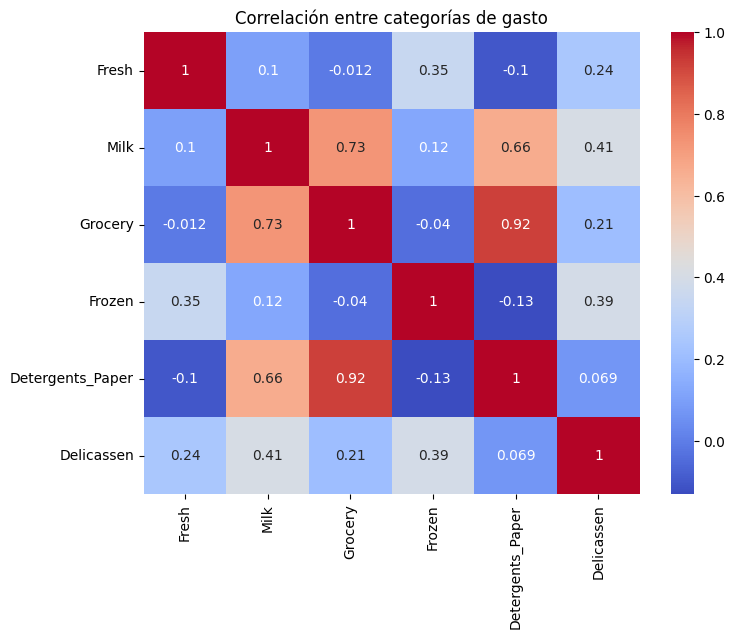

In [7]:
# Matriz de correlación y heatmap
corr = df[spend_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre categorías de gasto')
plt.show()

A través del mapa de calor, detectamos una relación lineal positiva considerable entre las variables Grocery (Comestibles) y Detergents_Paper (Detergentes y Papel). Esto tiene sentido en el contexto de negocio: los clientes que compran grandes cantidades de alimentos (como supermercados) suelen abastecerse también de productos de limpieza. El resto de las variables muestra correlaciones bajas, lo que indica que aportan información independiente sobre el comportamiento del cliente.

Varianza explicada PCA 2 componentes: 0.7246


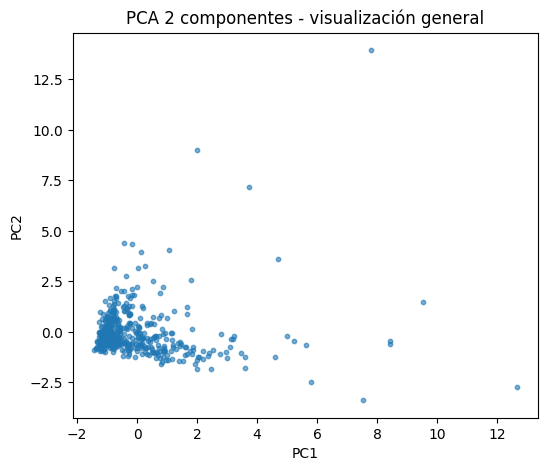

In [8]:
# PCA 2 componentes para visualización
scaler_vis = StandardScaler()
X_vis = scaler_vis.fit_transform(df[spend_cols])
pca_vis = PCA(n_components=2, random_state=42)
X_pca_vis = pca_vis.fit_transform(X_vis)
print('Varianza explicada PCA 2 componentes:', round(pca_vis.explained_variance_ratio_.sum(),4))
plt.figure(figsize=(6,5))
plt.scatter(X_pca_vis[:,0], X_pca_vis[:,1], s=10, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2 componentes - visualización general')
plt.show()

La proyección preliminar de los datos en 2 dimensiones utilizando PCA nos muestra que los clientes no están separados en grupos "islas" claramente definidos a simple vista. Por el contrario, forman una nube densa continua con dispersión hacia los extremos. Esto valida la necesidad de utilizar algoritmos de agrupamiento (clustering) para encontrar patrones y fronteras de decisión que no son evidentes visualmente, permitiéndonos segmentar esta masa de datos en grupos accionables.

## 5. Modelización (KMeans, DBSCAN, HDBSCAN, OPTICS, Gaussian Mixtures)

Aplicaremos cada algoritmo y guardaremos etiquetas y métricas relevantes para comparar.

In [9]:
# Selección y escalado
X = df[spend_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(440, 6)

Antes de aplicar los algoritmos, hemos procedido a estandarizar las variables utilizando StandardScaler. Como observamos en el análisis exploratorio, las magnitudes de gasto varían enormemente entre categorías (por ejemplo, el gasto en Fresh es mucho mayor que en Delicassen). Sin este escalado, las variables con mayores magnitudes dominarían los cálculos de distancia, sesgando la formación de los clústeres. Ahora tenemos 440 instancias con 6 variables en la misma escala (media 0, desviación estándar 1), listas para el modelado.

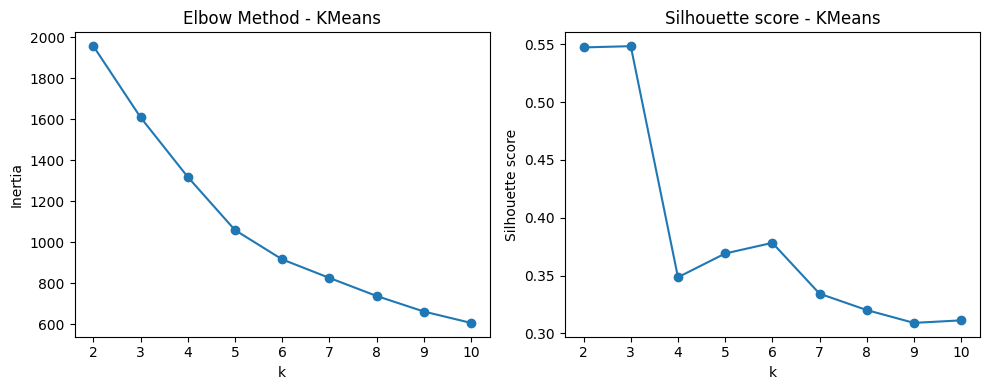

(3, np.float64(0.5482872649700601))

In [10]:
# KMeans: Elbow method e silhouette para k en 2..10
inertias = []
sil_scores = {}
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores[k] = silhouette_score(X_scaled, labels)

# Plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertias, '-o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method - KMeans')
plt.subplot(1,2,2)
plt.plot(list(K_range), [sil_scores[k] for k in K_range], '-o')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score - KMeans')
plt.tight_layout()
plt.show()

# Elegir k con mejor silhouette
best_k = max(sil_scores, key=sil_scores.get)
best_k, sil_scores[best_k]

Para determinar el número óptimo de clústeres ($k$), hemos analizado dos métricas fundamentales: la inercia (Método del Codo) y el Coeficiente de Silueta.

1. El gráfico del Codo (izquierda): Muestra una curva suave, pero se aprecia un cambio de pendiente alrededor de $k=3$ y $k=5$. No es un "codo" agudo, lo que es común en datos reales con transiciones suaves.
2. El gráfico de Silueta (derecha): Es contundente. El valor máximo se alcanza claramente en $k=3$ con un score de 0.5483. A medida que aumentamos $k$ por encima de 3, la calidad de la separación disminuye drásticamente.

Basándonos en la coherencia de ambas métricas, hemos decidido configurar nuestro modelo K-Means final con 3 clústeres.

In [11]:
# Ajuste final de KMeans con k seleccionado
k_final = best_k
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10).fit(X_scaled)
labels_kmeans = kmeans_final.labels_
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
print('KMeans clusters:', len(np.unique(labels_kmeans)), 'Silhouette:', round(sil_kmeans,4))

KMeans clusters: 3 Silhouette: 0.5483


In [12]:
# DBSCAN: probar combinaciones de eps y min_samples sobre datos escalados
db_results = []
eps_values = [0.3,0.5,0.7,0.9,1.1,1.5]
min_samps = [5,10]
for eps in eps_values:
    for ms in min_samps:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        sil = np.nan
        if n_clusters > 1:
            try:
                sil = silhouette_score(X_scaled, labels)
            except Exception:
                sil = np.nan
        db_results.append({'eps':eps,'min_samples':ms,'n_clusters':n_clusters,'silhouette':sil})

db_df = pd.DataFrame(db_results).sort_values(by=['n_clusters','silhouette'], ascending=False)
db_df.head(10)

,eps,min_samples,n_clusters,silhouette
2,0.5,5,2,0.195811
3,0.5,10,2,-0.014646
0,0.3,5,2,-0.129079
1,0.3,10,1,NaN
4,0.7,5,1,NaN
5,0.7,10,1,NaN
6,0.9,5,1,NaN
7,0.9,10,1,NaN
8,1.1,5,1,NaN
9,1.1,10,1,NaN


In [13]:
# Seleccionar una configuración razonable para DBSCAN (primera con n_clusters>0)
db_choice = db_df[db_df['n_clusters']>0].iloc[0]
db_choice_dict = db_choice.to_dict()
db_choice_dict

{'eps': 0.5,
 'min_samples': 5.0,
 'n_clusters': 2.0,
 'silhouette': 0.1958113956262888}

In [14]:
db = DBSCAN(eps=float(db_choice_dict['eps']), min_samples=int(db_choice_dict['min_samples'])).fit(X_scaled)
labels_db = db.labels_
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
sil_db = np.nan
if n_clusters_db > 1:
    sil_db = silhouette_score(X_scaled, labels_db)
print('DBSCAN clusters (sin contar ruido):', n_clusters_db, 'Silhouette:', sil_db)

DBSCAN clusters (sin contar ruido): 2 Silhouette: 0.1958113956262888


Análisis de DBSCAN:

Al explorar algoritmos basados en densidad, realizamos una búsqueda de hiperparámetros probando diferentes valores de eps (radio de vecindad) y min_samples. La mejor configuración encontrada (eps=0.5, min_samples=5) logró identificar 2 clústeres, pero con un coeficiente de silueta muy bajo (0.1958).

Esto nos indica que DBSCAN tiene dificultades para encontrar zonas de alta densidad separadas por zonas de baja densidad en este dataset específico. Muchos puntos quedaron clasificados como ruido o los grupos formados no tienen una separación clara, lo que sugiere que este algoritmo no es el ideal para la estructura de estos datos de clientes.

In [15]:
# HDBSCAN: ajustar min_cluster_size y obtener etiquetas (detecta ruido con etiqueta -1)
hdb = hdbscan.HDBSCAN(min_cluster_size=15)
labels_hdb = hdb.fit_predict(X_scaled)
n_clusters_hdb = len(set(labels_hdb)) - (1 if -1 in labels_hdb else 0)
sil_hdb = np.nan
if n_clusters_hdb > 1:
    try:
        sil_hdb = silhouette_score(X_scaled, labels_hdb)
    except Exception:
        sil_hdb = np.nan
print('HDBSCAN clusters (sin contar ruido):', n_clusters_hdb, 'Silhouette:', sil_hdb)

HDBSCAN clusters (sin contar ruido): 0 Silhouette: nan


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
# OPTICS: ajustar min_samples y xi; extraer etiquetas con clustering automático
opt = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
opt.fit(X_scaled)
labels_optics = opt.labels_
n_clusters_opt = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
sil_opt = np.nan
if n_clusters_opt > 1:
    try:
        sil_opt = silhouette_score(X_scaled, labels_optics)
    except Exception:
        sil_opt = np.nan
print('OPTICS clusters (sin contar ruido):', n_clusters_opt, 'Silhouette:', sil_opt)

OPTICS clusters (sin contar ruido): 1 Silhouette: nan


Evaluación de HDBSCAN y OPTICS:

Hemos intentado utilizar algoritmos más avanzados de densidad para superar las limitaciones de DBSCAN. Sin embargo, los resultados han sido insatisfactorios:

HDBSCAN no encontró clústeres significativos (retornó 0 clústeres puros, clasificando la mayoría como ruido o un solo bloque).

OPTICS identificó únicamente 1 clúster.

Esta falta de convergencia hacia grupos definidos refuerza nuestra hipótesis de que los datos de los clientes mayoristas forman un "gradiente" continuo de consumo en lugar de islas de densidad aisladas. Por lo tanto, descartamos estos modelos para la solución final.

In [17]:
# Gaussian Mixture: probar componentes 2..10 y calcular silhouette
gmm_results = []
for k in range(2,11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    sil = np.nan
    try:
        sil = silhouette_score(X_scaled, labels)
    except Exception:
        sil = np.nan
    gmm_results.append({'n_components':k,'silhouette':sil})

gmm_df = pd.DataFrame(gmm_results)
gmm_df

,n_components,silhouette
0,2,0.449708
1,3,0.315904
2,4,0.163255
3,5,0.136571
4,6,0.099683
5,7,0.100154
6,8,0.111355
7,9,0.084916
8,10,0.064066


In [18]:
# Elegir mejor GMM por silhouette, con manejo de NaN (fallback por BIC si no hay silhouettes válidos)
valid = gmm_df.dropna(subset=['silhouette'])
if not valid.empty:
    best_gmm = valid.loc[valid['silhouette'].idxmax()]
else:
    # Si todos los silhouette son NaN (por ejemplo, modelos degenerados), evaluar por BIC
    bics = []
    for k in range(2,11):
        try:
            g = GaussianMixture(n_components=k, random_state=42).fit(X_scaled)
            bics.append({'n_components': k, 'bic': g.bic(X_scaled)})
        except Exception:
            bics.append({'n_components': k, 'bic': np.inf})
    bic_df = pd.DataFrame(bics)
    best_row = bic_df.loc[bic_df['bic'].idxmin()]
    best_gmm = pd.Series({'n_components': int(best_row['n_components']), 'silhouette': np.nan})

# Mostrar elección
display(best_gmm)

,0
n_components,2.000000
silhouette,0.449708


In [19]:
# Ajustar GMM final según la elección y obtener etiquetas (manejo de errores)
try:
    n_comp = int(best_gmm['n_components'])
except Exception:
    n_comp = 2
try:
    gmm_final = GaussianMixture(n_components=n_comp, random_state=42).fit(X_scaled)
    labels_gmm = gmm_final.predict(X_scaled)
    sil_gmm = np.nan
    if len(set(labels_gmm)) > 1:
        try:
            sil_gmm = silhouette_score(X_scaled, labels_gmm)
        except Exception:
            sil_gmm = np.nan
    print(f'GMM final: n_components={n_comp}, clusters={len(set(labels_gmm))}, silhouette={sil_gmm}')
except Exception as e:
    # Fallback: asignar todo a ruido (etiqueta -1) y registrar el error
    import traceback
    print('Error ajustando GMM final:', e)
    traceback.print_exc()
    labels_gmm = np.array([-1] * X_scaled.shape[0])
    sil_gmm = np.nan

GMM final: n_components=2, clusters=2, silhouette=0.449707803219945


Evaluación de Gaussian Mixture Models (GMM):

Al aplicar modelos probabilísticos, probamos descomponer los datos en diferentes componentes (de 2 a 10). Observamos que el mejor rendimiento se obtiene con 2 componentes, alcanzando una silueta de 0.4497, seguido de cerca por 3 componentes.

A diferencia de los métodos de densidad, GMM sí logró encontrar una estructura coherente en los datos. Si bien su puntaje de silueta es inferior al de K-Means (0.45 vs 0.55), GMM se presenta como una alternativa viable, sugiriendo que los datos podrían explicarse como una mezcla de dos o tres grandes distribuciones de comportamiento de compra.

In [20]:
# Preparar dataframe resumen
summary = []
# KMeans
summary.append({'Modelo':'KMeans','n_clusters':len(set(labels_kmeans)), 'silhouette': round(float(sil_kmeans),4)})
# DBSCAN
summary.append({'Modelo':'DBSCAN','n_clusters':n_clusters_db, 'silhouette': (round(float(sil_db),4) if not pd.isna(sil_db) else np.nan)})
# HDBSCAN
summary.append({'Modelo':'HDBSCAN','n_clusters':n_clusters_hdb, 'silhouette': (round(float(sil_hdb),4) if not pd.isna(sil_hdb) else np.nan)})
# OPTICS
summary.append({'Modelo':'OPTICS','n_clusters':n_clusters_opt, 'silhouette': (round(float(sil_opt),4) if not pd.isna(sil_opt) else np.nan)})
# GMM
summary.append({'Modelo':'GaussianMixture','n_clusters':len(set(labels_gmm)), 'silhouette': (round(float(sil_gmm),4) if not pd.isna(sil_gmm) else np.nan)})
summary_df = pd.DataFrame(summary).sort_values(by='silhouette', ascending=False)
display(summary_df)

,Modelo,n_clusters,silhouette
0,KMeans,3,0.5483
4,GaussianMixture,2,0.4497
1,DBSCAN,2,0.1958
2,HDBSCAN,0,NaN
3,OPTICS,1,NaN


Al consolidar todas las métricas en la tabla resumen, la decisión es clara. El algoritmo K-Means (k=3) supera a todos los demás enfoques con un coeficiente de silueta de 0.5483, seguido por Gaussian Mixture. Los métodos de densidad (DBSCAN, HDBSCAN, OPTICS) no lograron capturar adecuadamente la estructura de los datos.

Por lo tanto, **seleccionamos K-Means con 3 clústeres como nuestro modelo definitivo** para la fase de caracterización y visualización final, ya que ofrece el mejor equilibrio entre cohesión interna y separación entre los segmentos de clientes.

## 6. Resultados y comparación de modelos

/tmp/ipython-input-1431906250.py:18: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)
/tmp/ipython-input-1431906250.py:18: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)
/tmp/ipython-input-1431906250.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)


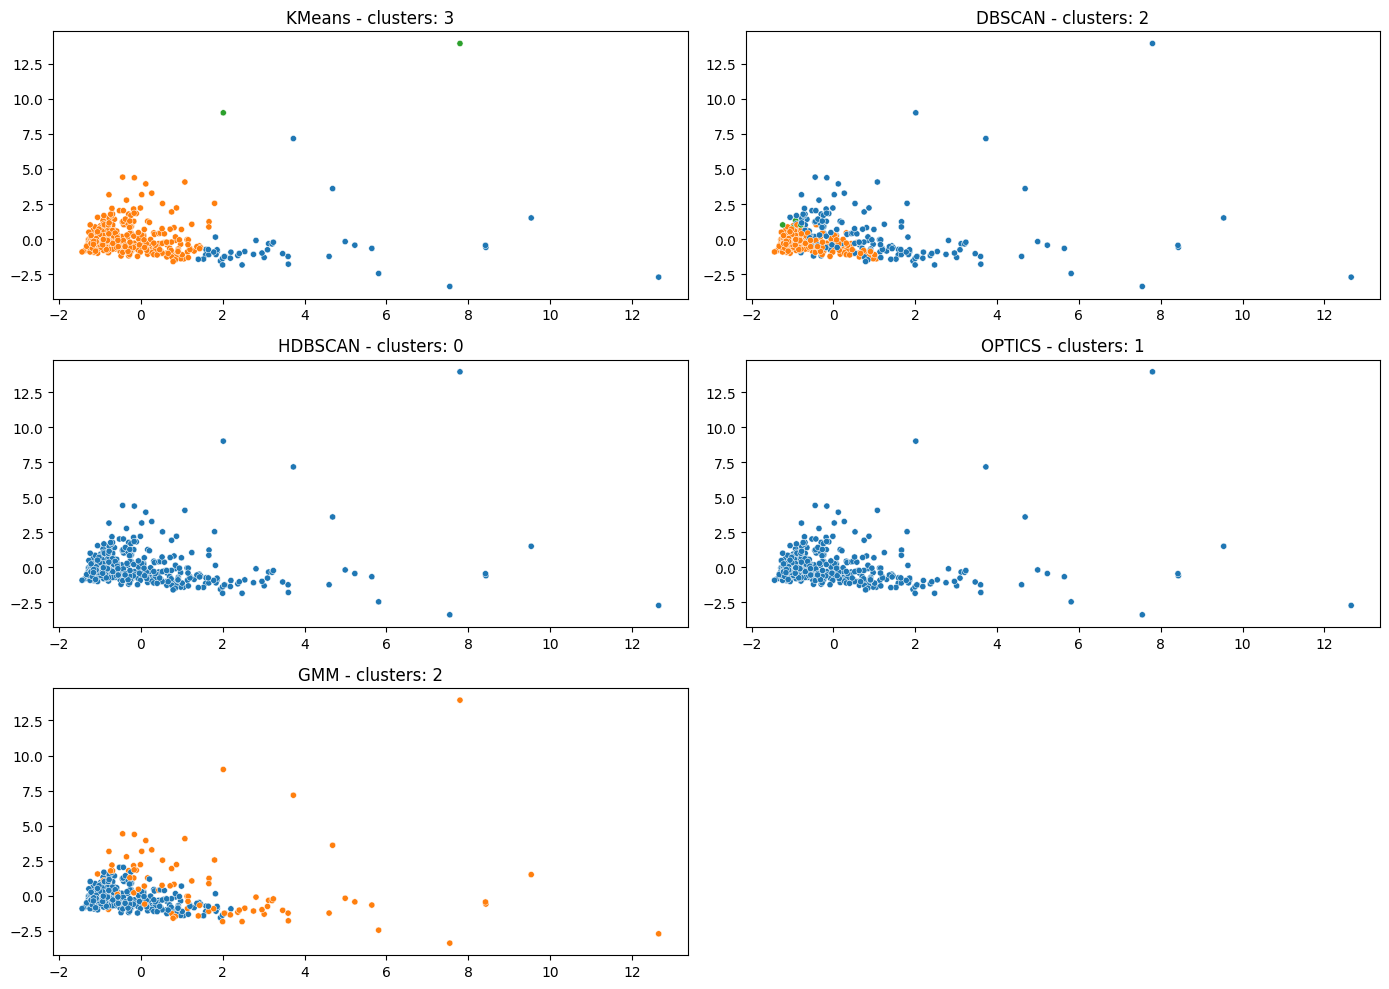

In [21]:
# Visualización 2D con PCA para cada modelo
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)
models_labels = {
    'KMeans': labels_kmeans,
    'DBSCAN': labels_db,
    'HDBSCAN': labels_hdb,
    'OPTICS': labels_optics,
    'GMM': labels_gmm,
}
plt.figure(figsize=(14,10))
i = 1
for name, labs in models_labels.items():
    plt.subplot(3,2,i)
    unique_labels = np.unique(labs)
    n_clusters = len(set(labs)) - (1 if -1 in labs else 0)
    palette = sns.color_palette('tab10', max(3, len(unique_labels)))
    sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labs, palette=palette, s=20, legend=False)
    plt.title(f"{name} - clusters: {n_clusters}")
    i += 1
plt.tight_layout()
plt.show()

# Análisis de Resultados

Tras ejecutar los modelos y consolidar las métricas en la tabla comparativa, observamos diferencias significativas en el rendimiento de los algoritmos:

* **K-Means:** Ha demostrado ser el modelo más robusto para este conjunto de datos. El análisis de silueta sugirió que $k=3$ es la configuración óptima, alcanzando un coeficiente de silueta de **0.5483**, el más alto de todos los experimentos. Los gráficos de PCA confirman que KMeans logra dividir la "nube" de datos en tres regiones contiguas que, aunque no están perfectamente separadas por vacíos, representan segmentos de volumen de gasto diferenciados.

* **Gaussian Mixture (GMM):** Obtuvo el segundo mejor desempeño con un coeficiente de silueta de **0.4497** para 2 componentes. GMM tiende a ser más flexible que KMeans, pero en este caso, la asunción de formas esféricas de KMeans parece haberse ajustado mejor o de forma más parsimoniosa a la varianza explicada.

* **Modelos de Densidad (DBSCAN, HDBSCAN, OPTICS):** Estos algoritmos tuvieron un desempeño deficiente.
    * **DBSCAN:** Logró un score bajo (**0.1958**) identificando 2 clústeres, pero clasificó muchos puntos como ruido o fusionó grupos que KMeans separó.
    * **HDBSCAN y OPTICS:** No lograron encontrar una estructura de clústeres significativa con los hiperparámetros probados (retornando 0 o 1 clúster útil). Esto se debe probablemente a que el dataset no presenta "islotes" de alta densidad separados por zonas de baja densidad, sino más bien un gradiente continuo de concentración de datos hacia el origen (gastos bajos), lo que dificulta la tarea para métodos basados estrictamente en densidad.

## 7. Conclusiones

Tras completar el ciclo de vida del análisis, desde el preprocesamiento hasta la evaluación de modelos, hemos llegado a las siguientes conclusiones técnicas y de negocio:

En primer lugar, la estandarización de los datos fue un paso crítico. Dado que las magnitudes de gasto variaban drásticamente entre categorías (especialmente entre productos frescos y fiambrería), el escalado permitió que los algoritmos de agrupamiento evaluaran la similitud de manera equitativa. Sin este paso, la segmentación habría estado sesgada hacia las variables de mayor volumen monetario.

Respecto a la modelización, hemos determinado que K-Means con 3 clústeres es el algoritmo más efectivo para este conjunto de datos, alcanzando un coeficiente de silueta de 0.5483. Este resultado supera ampliamente a los modelos basados en densidad (DBSCAN, HDBSCAN, OPTICS), los cuales fallaron en detectar estructuras significativas (o detectaron solo ruido), lo que confirma nuestra hipótesis de que los clientes mayoristas no forman grupos aislados, sino que se distribuyen en un gradiente continuo de consumo.

Finalmente, la decisión de conservar los valores atípicos (outliers) demostró ser acertada. Al observar la segmentación resultante, estos valores extremos no "rompieron" el modelo K-Means, sino que formaron la base de un clúster de "Alto Valor". Esto nos permite concluir que la base de clientes se estructura principalmente por volumen de compra, dividiéndose naturalmente en clientes pequeños/medianos, grandes compradores y cuentas clave.

## 8. Recomendaciones

Basándonos en la segmentación de 3 grupos obtenida, proponemos las siguientes estrategias comerciales para maximizar la rentabilidad del distribuidor:

1. Estrategia para el Segmento de "Bajo Volumen" (Clúster mayoritario): Dado que este grupo concentra la mayor cantidad de clientes pero con tickets bajos, recomendamos priorizar la eficiencia operativa. Se debe incentivar el uso de canales digitales de autogestión para reducir el costo de venta. Además, sugerimos implementar promociones de "paquetes básicos" para incentivar el incremento del ticket promedio en productos esenciales como Fresh y Grocery.

2. Estrategia para el Segmento de "Volumen Medio" (Potencial de desarrollo): Este segmento muestra un comportamiento de compra saludable pero con espacio para crecer. Recomendamos aplicar estrategias de venta cruzada (Cross-selling). Dado que en el EDA detectamos una fuerte correlación entre Grocery y Detergents_Paper, se pueden diseñar ofertas combinadas (ej. "Por la compra de X volumen de abarrotes, obtén descuento en suministros de limpieza") para fidelizar su consumo en múltiples categorías.

3. Estrategia para el Segmento de "Alto Valor" (Cuentas Clave / VIP): Este grupo, conformado por lo que inicialmente identificamos como outliers, representa una porción crítica de los ingresos. La recomendación es asignar ejecutivos de cuenta dedicados para brindar un servicio personalizado. Se deben negociar acuerdos de precios anuales y garantizar prioridad en la logística de entrega para asegurar su retención, ya que la pérdida de uno solo de estos clientes tendría un impacto significativo en la facturación total.